# Stage 4. Exploratory Data Analysis

In addition to the data that you obtained in the previous task, you have been given a second file. Now, you have the following two CSV files:

`/content/project_sql_result_01.csv` - contains the following data:

`company_name`: the name of the taxi company

`trips_amount`: number of trips for each taxi company on 15-16 November 2017.

`/content/project_sql_result_04.csv` - contains the following data:

`dropoff_location_name`: the name of the Chicago area where the trip ends

`average_trips`: the average number of trips ending in each region in November 2017.

For both datasets, you will now need to
- import both files
- study the contents of the data
- make sure the data type is correct
- identify the top 10 regions to serve as delivery points
- charting: taxi companies and their number of trips, top 10 regions by number of drop offs
- draw conclusions based on the graphs that have been made and explain the results

# 4.1 Import both files

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

#for importing files to google collab
from google.colab import files

In [ ]:
#upload datasets
#uploaded = files.upload()

In [ ]:
company_df = pd.read_csv('/content/project_sql_result_01.csv')
trips_df = pd.read_csv('/content/project_sql_result_04.csv')

# 4.2 Learn and Load the Data

In [ ]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
company_df.shape

(64, 2)

In [ ]:
company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
company_df.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

**Conclusion**

Following are the findings on the `project_sql_result_01.csv` dataset
- There are 64 rows of data, and 2 columns
- Has a mean of 2145 in `trips_amount`
- Has a median of 178.5 in `trips_amount`
- the minimum `trips_amount` is 2
- The maximum `trips_amount` is 19558
- There is no missing value (NULL) has been found

In [ ]:
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
trips_df.shape

(94, 2)

In [ ]:
trips_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [ ]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
trips_df.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

**Conclusion**

Here are the findings on the `/content/project_sql_result_04.csv` dataset

- There are 94 rows of data, and 2 columns
- Has a mean of 600 in `average_trips`
- Has a median of 52 in `average_trips`
- the smallest `average_trips` is 1714
- The most `average_trips` is 10727
- There is no missing values (NULL) has been found

# 4.3 Ensure the datatype is correct

In [ ]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
company_df.dtypes

company_name    object
trips_amount     int64
dtype: object

In [ ]:
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
trips_df.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [ ]:
#there is an incorrect datatype, convert float to int
trips_df['average_trips'] = trips_df['average_trips'].apply(np.ceil).astype('int')

In [ ]:
trips_df.dtypes

dropoff_location_name    object
average_trips             int64
dtype: object

**Conclusion**

- Convert the `average_trips` datatype in the `trips_df` dataset to `int`, to be the same as the `trips_amount` datatype in the `company_df` dataset

# 4.4 identifies the top 10 regions to serve as delivery points

In [ ]:
top_10_dropoff = trips_df.sort_values('average_trips', ascending=False).head(10)

In [ ]:
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


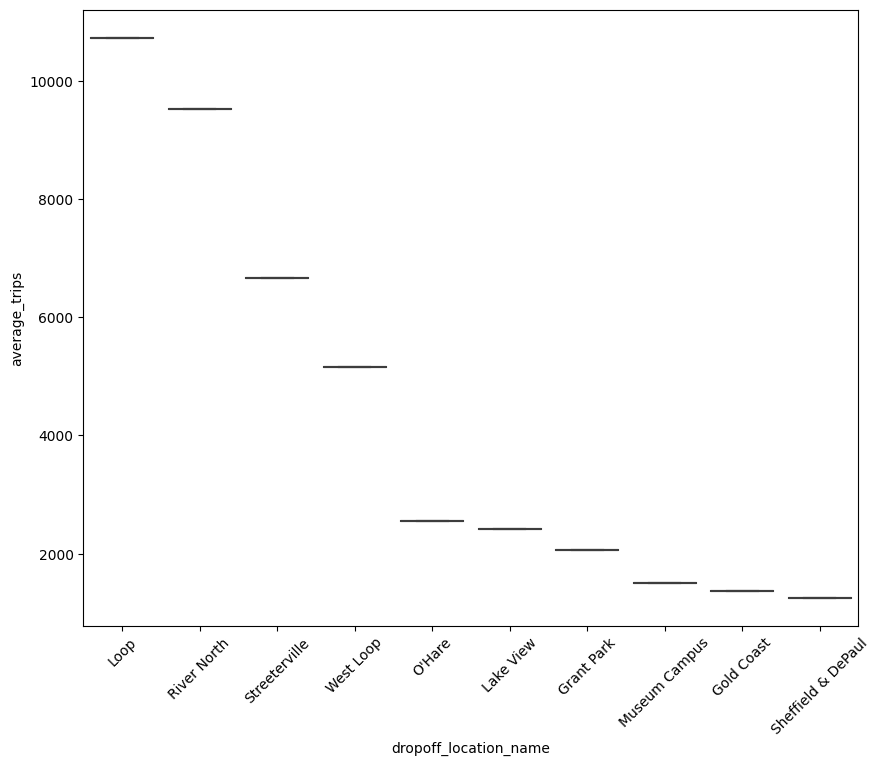

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot (data=top_10_dropoff, x='dropoff_location_name', y='average_trips', orient='v')
plt.xticks(rotation=45);

**Conclusion**

- The most popular dropoff location is occupied by Loop, with an `average_trips` at 10728
- Meanwhile, position no. 10 is occupied by Sheffield & DePaul, with an `average_trips` at 1260

# 4.5 create a chart: taxi companies and their number of trips with top 10 regions by number of drop offs

In [ ]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
top_10_companies = company_df.sort_values('trips_amount', ascending=False).head(10)

In [ ]:
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


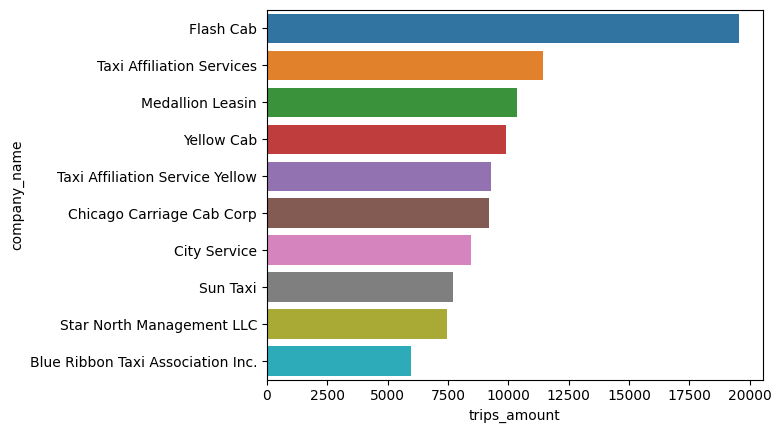

In [ ]:
sns.barplot(data=top_10_companies, y='company_name', x='trips_amount', orient='h');

In [ ]:
top_10_companies['company_name'].value_counts()

Flash Cab                            1
Taxi Affiliation Services            1
Medallion Leasin                     1
Yellow Cab                           1
Taxi Affiliation Service Yellow      1
Chicago Carriage Cab Corp            1
City Service                         1
Sun Taxi                             1
Star North Management LLC            1
Blue Ribbon Taxi Association Inc.    1
Name: company_name, dtype: int64

**Conclusion**

- The taxi company that has the largest number of trips is occupied by Flash Cab with a `trips_amount` at 19558
- While the number 10 position is occupied by Blue Ribbon Taxi Association Inc., with a `trips_amount` at 5953

# Stage 5. Testing the Hypothesis

`/content/project_sql_result_07.csv` — the result of the last query. This file contains travel data from the Loop to O'Hare International Airport. Remember, the following are the values for the columns in this table:

- `start_ts` — pick-up date and time
- `weather_conditions` — the weather conditions when the trip started
- `duration_seconds` — duration of the trip in seconds

Test the following hypotheses:

"The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

Determine independently how big the level of significance (alpha).

Explain:

- How do you formulate the null hypothesis and the alternative hypothesis
- What criteria did you use to test your hypothesis and why did you use them

# 5.1 import the dataset and check the outliers

In [ ]:
loop_ohare = pd.read_csv('/content/project_sql_result_07.csv')

In [ ]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
pd.to_datetime(loop_ohare['start_ts']).dt.month.value_counts()

11    1068
Name: start_ts, dtype: int64

In [ ]:
pd.to_datetime(loop_ohare['start_ts']).dt.day.value_counts()

11    426
4     367
18    180
25     95
Name: start_ts, dtype: int64

In [ ]:
loop_ohare['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [ ]:
loop_ohare.shape

(1068, 3)

In [ ]:
loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [ ]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
loop_ohare.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [ ]:
loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


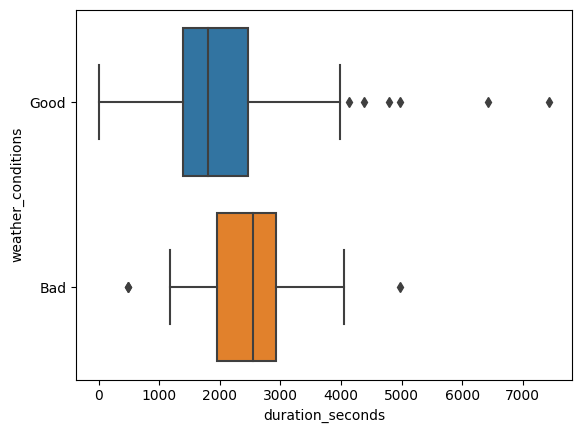

In [ ]:
sns.boxplot(x='duration_seconds', y='weather_conditions', data=loop_ohare);

**Conclusion**

There are outliers with extreme values, so we need to take it out

In [ ]:
#Remove outliers
Q1 = loop_ohare['duration_seconds'].quantile(0.25)
Q3 = loop_ohare['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

if lower_whisker < 0:
    lower_whisker = 0

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)
print('min: ', lower_whisker)
print('max: ', upper_whisker)

Q1:  1438.25
Q3:  2580.0
IQR:  1141.75
min:  0
max:  4292.625


In [ ]:
loop_ohare_without_outliers = loop_ohare[(loop_ohare['duration_seconds']>lower_whisker) &
                                         (loop_ohare['duration_seconds']<upper_whisker)]

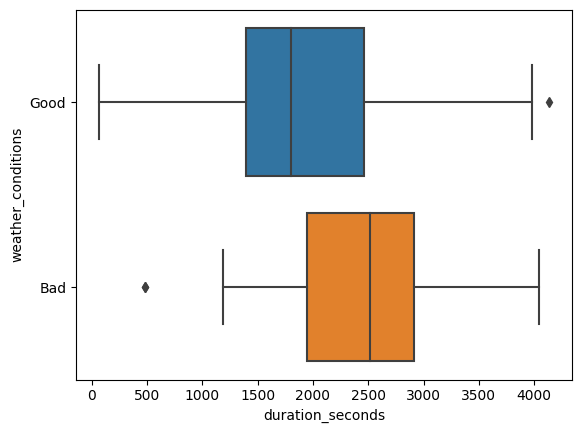

In [ ]:
sns.boxplot(x='duration_seconds', y='weather_conditions', data=loop_ohare_without_outliers);

**Conclusion**

There is no outliers with extreme values, so we can proceed to the hypothesis testing stage

# 5.2 Test the hypothesis

Test the following hypotheses:

"The average trip duration from the Loop to O'Hare International Airport has been changed on rainy days at Saturdays."

- Null Hypothesis (H0): "The average trip duration from the Loop to O'Hare International Airport is SAME on Saturday."
- Alternate Hypothesis (H1): "Average trip duration from the Loop to O'Hare International Airport DID NOT SAME/CHANGED on Saturday."

In [ ]:
loop_ohare_without_outliers.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
pd.to_datetime(loop_ohare_without_outliers['start_ts']).dt.date.value_counts()

2017-11-11    421
2017-11-04    365
2017-11-18    178
2017-11-25     92
Name: start_ts, dtype: int64

In [ ]:
loop_ohare_without_outliers['weather_conditions'].value_counts()

Good    877
Bad     179
Name: weather_conditions, dtype: int64

In [ ]:
good_weather_data = loop_ohare_without_outliers[loop_ohare_without_outliers['weather_conditions']=='Good'].reset_index(drop=True)
bad_weather_data = loop_ohare_without_outliers[loop_ohare_without_outliers['weather_conditions']=='Bad'].reset_index(drop=True)

In [ ]:
good_weather_data.shape, bad_weather_data.shape

((877, 3), (179, 3))

In [ ]:
good_weather_data.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Show `good_weather_data` and `bad_weather_data` variances

In [ ]:
np.var(good_weather_data['duration_seconds'])

473991.7496388771

In [ ]:
np.var(good_weather_data['duration_seconds'])

473991.7496388771

In [ ]:
#H0 : the variances of group 1 (good weather) and group 2 (bad weather) are the same
#H1 : the variances of group 1 (good weather) and group 2 (bad weather) are not the same

In [ ]:
alpha = 0.05

p_value_levene = st.levene(good_weather_data['duration_seconds'], bad_weather_data['duration_seconds']).pvalue
print('p-value: ', p_value_levene)

if p_value_levene < alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print('Fail to Reject H0: We don`t have enough evidence to say that variance of sample 1 and sample 2 are not the same')

p-value:  0.7888178851804917
Fail to Reject H0: We don`t have enough evidence to say that variance of sample 1 and sample 2 are not the same


In [ ]:
p_value_ttest = st.ttest_ind(good_weather_data['duration_seconds'],
                             bad_weather_data['duration_seconds'], equal_var=True).pvalue
print('p-value', p_value_ttest)

if(p_value_ttest < alpha):
    print("We reject the null hypothesis")
else:
    print("We can`t reject the null hypothesis")

p-value 2.3968233040077725e-13
We reject the null hypothesis


**Conclusion**

In Levene's p-value test we find that there is a strong correlation between `good_weather_data` and `bad_weather_data`. And then, in the independent ttest we get that from the Loop to the International Airport the duration has been changed (Reject H0)